In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
 
from matplotlib import pyplot as plt
 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [72]:
df_ = datasets.fetch_california_housing() 
print(df_.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [326]:
df = pd.DataFrame(df_['data'], columns=df_['feature_names'])
df['MedHouseVal'] = df_['target']

In [320]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [321]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


судя по статичтике, пропусков нет

In [322]:
Y = df_['target']
del df['MedHouseVal']
X = df

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [323]:
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X_train, Y_train)

rmse = np.sqrt(mean_squared_error(Y_test, model.predict(X_test)))
r2 = r2_score(Y_test, model.predict(X_test))
print('MSE:', rmse)
print('R2:', r2)

MSE: 0.7273129773603114
R2: 0.5943232652466202


получили метрики модели на исходных данных

Text(0.5, 1.0, 'Распределение величины MedHouseVal')

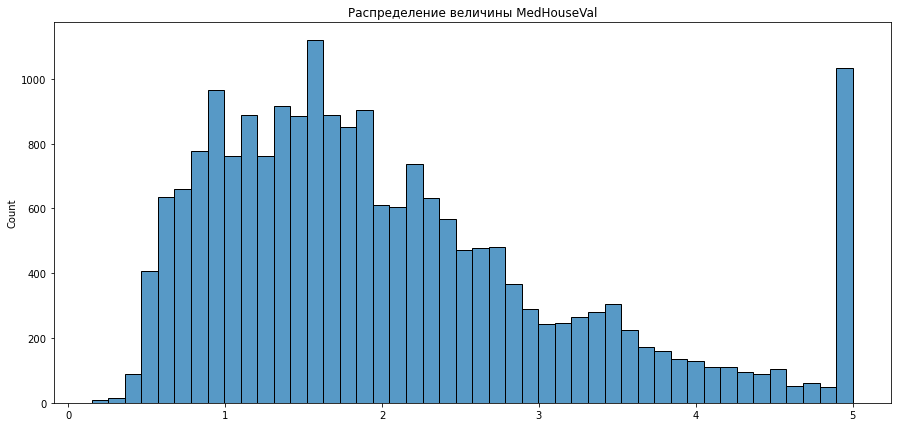

In [324]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)

sns.histplot(Y)
plt.title('Распределение величины MedHouseVal')

распределение целевой переменной далеко от нормального, аномально выглядит встречаемость предельного значения, выбросами такие значения считать нельзя 

In [31]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot:>

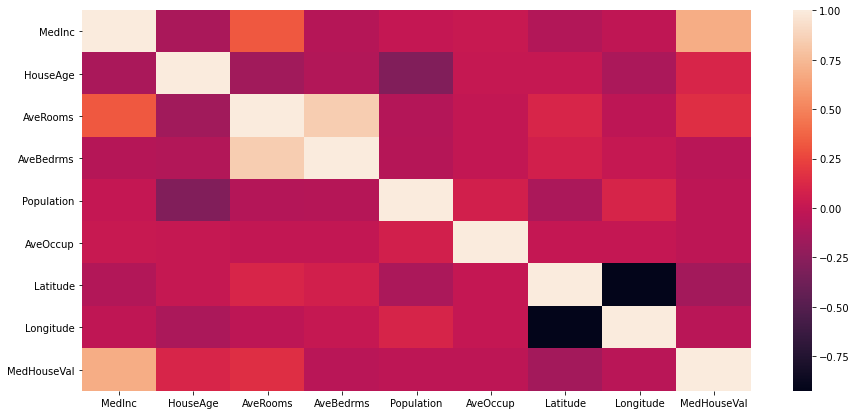

In [36]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)

sns.heatmap(df.corr())

Вывод: признаки AveBedrms и AveRooms достаточно сильно скоррелированы, какой-то из них можно удалить. Наиболее важный признак для нашей целевой переменной MedInc (самая высокая корреляция в 0.688075). Широта и долгота близки к обратной пропорциональной зависимости. Самые несущественные для целевой переменной признаки: Population, AveOccup. Удалим их.

In [327]:
Y = df_['target']
del df['MedHouseVal'], df['Population'], df['AveOccup']
X = df

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [328]:
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X_train, Y_train)

rmse = np.sqrt(mean_squared_error(Y_test, model.predict(X_test)))
r2 = r2_score(Y_test, model.predict(X_test))
print('MSE:', rmse)
print('R2:', r2)

MSE: 0.7294513603133057
R2: 0.5919342869002977


результаты значительно не изменились

In [301]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,41.950000,-114.310000


<AxesSubplot:>

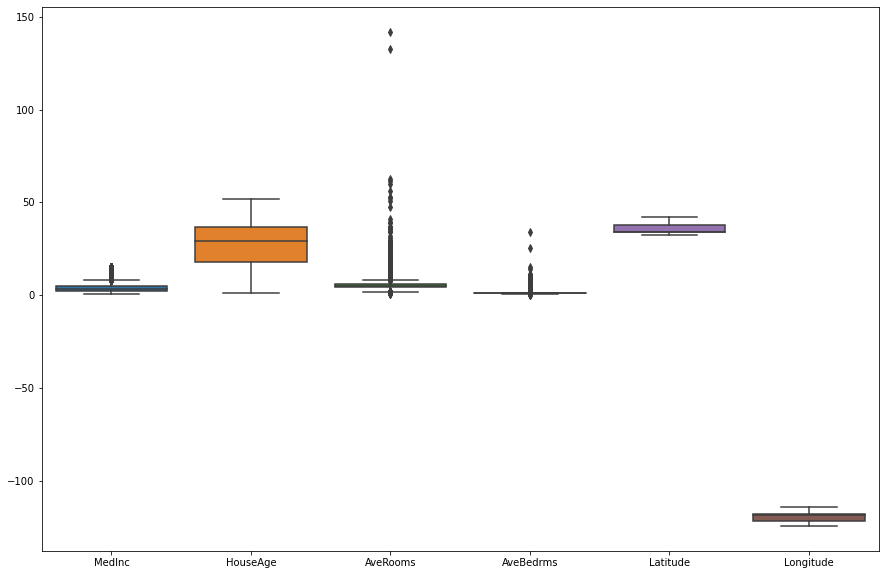

In [312]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

sns.boxplot(data=X)

По признакам AveRooms и AveBedrms имеем выбросы, удаляем:

In [329]:
X['MedHouseVal'] = df_['target']

q1 = X['AveRooms'].quantile(0.25)
q3 = X['AveRooms'].quantile(0.75)

iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = X[X['AveRooms'].between(lower_bound, upper_bound, inclusive=True)].sort_values('AveRooms')
remove_outliers

q1 = remove_outliers['AveBedrms'].quantile(0.25)
q3 = remove_outliers['AveBedrms'].quantile(0.75)

iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = remove_outliers[remove_outliers['AveBedrms'].between(lower_bound, upper_bound, inclusive=True)].sort_values('AveBedrms')
remove_outliers

,MedInc,HouseAge,AveRooms,AveBedrms,Latitude,Longitude,MedHouseVal
12747,4.8194,37.0,4.989899,0.868687,38.63,-121.37,1.411
20324,3.5625,31.0,4.386905,0.869048,34.25,-119.12,1.941
8554,5.2500,41.0,3.478261,0.869565,33.92,-118.39,2.472
14944,4.9286,24.0,5.781065,0.869822,32.74,-116.98,1.737
1484,5.4482,20.0,4.577236,0.869919,37.95,-122.05,1.908
...,...,...,...,...,...,...,...
1996,1.2344,52.0,5.316602,1.231660,36.73,-119.78,0.433
12639,1.7714,38.0,5.542857,1.231746,38.53,-121.45,0.699
12145,2.1848,16.0,5.939734,1.231955,33.71,-117.21,0.979
3345,2.7188,26.0,6.828000,1.232000,41.07,-121.11,0.481


<AxesSubplot:>

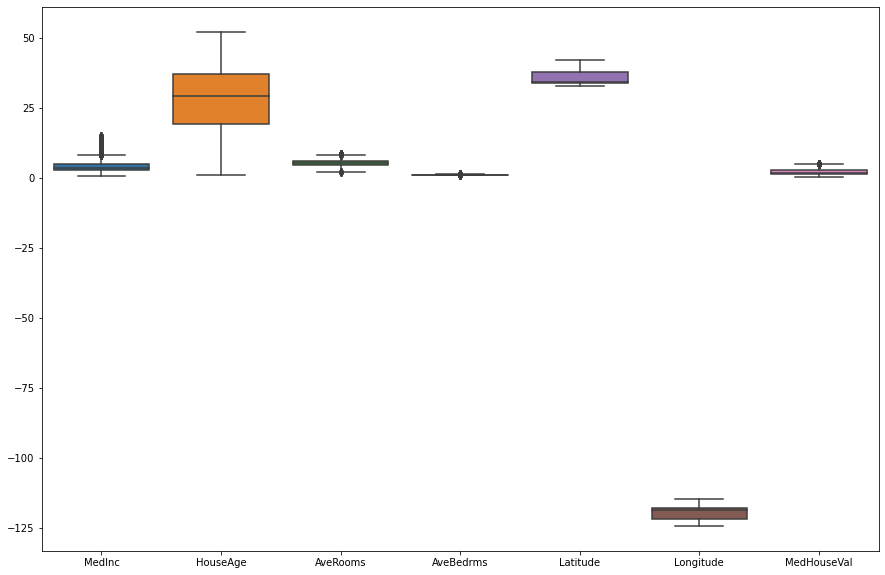

In [314]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

sns.boxplot(data=remove_outliers)

In [330]:
Y = remove_outliers['MedHouseVal']
del remove_outliers['MedHouseVal']
X = remove_outliers

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X_train, Y_train)

rmse = np.sqrt(mean_squared_error(Y_test, model.predict(X_test)))
r2 = r2_score(Y_test, model.predict(X_test))
print('MSE:', rmse)
print('R2:', r2)

MSE: 0.6960603862616253
R2: 0.6252335946643313


In [ ]:
показатели немного улучшились

In [331]:
X['MedHouseVal'] = Y
X.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.138969,0.731098,-0.226373,-0.067616,-0.021476,0.686275
HouseAge,-0.138969,1.000000,-0.201703,-0.074355,0.017454,-0.101050,0.106871
AveRooms,0.731098,-0.201703,1.000000,-0.017163,0.116014,-0.090667,0.352418
AveBedrms,-0.226373,-0.074355,-0.017163,1.000000,0.022971,0.007816,-0.079481
Latitude,-0.067616,0.017454,0.116014,0.022971,1.000000,-0.935115,-0.126653
Longitude,-0.021476,-0.101050,-0.090667,0.007816,-0.935115,1.000000,-0.054411
MedHouseVal,0.686275,0.106871,0.352418,-0.079481,-0.126653,-0.054411,1.000000


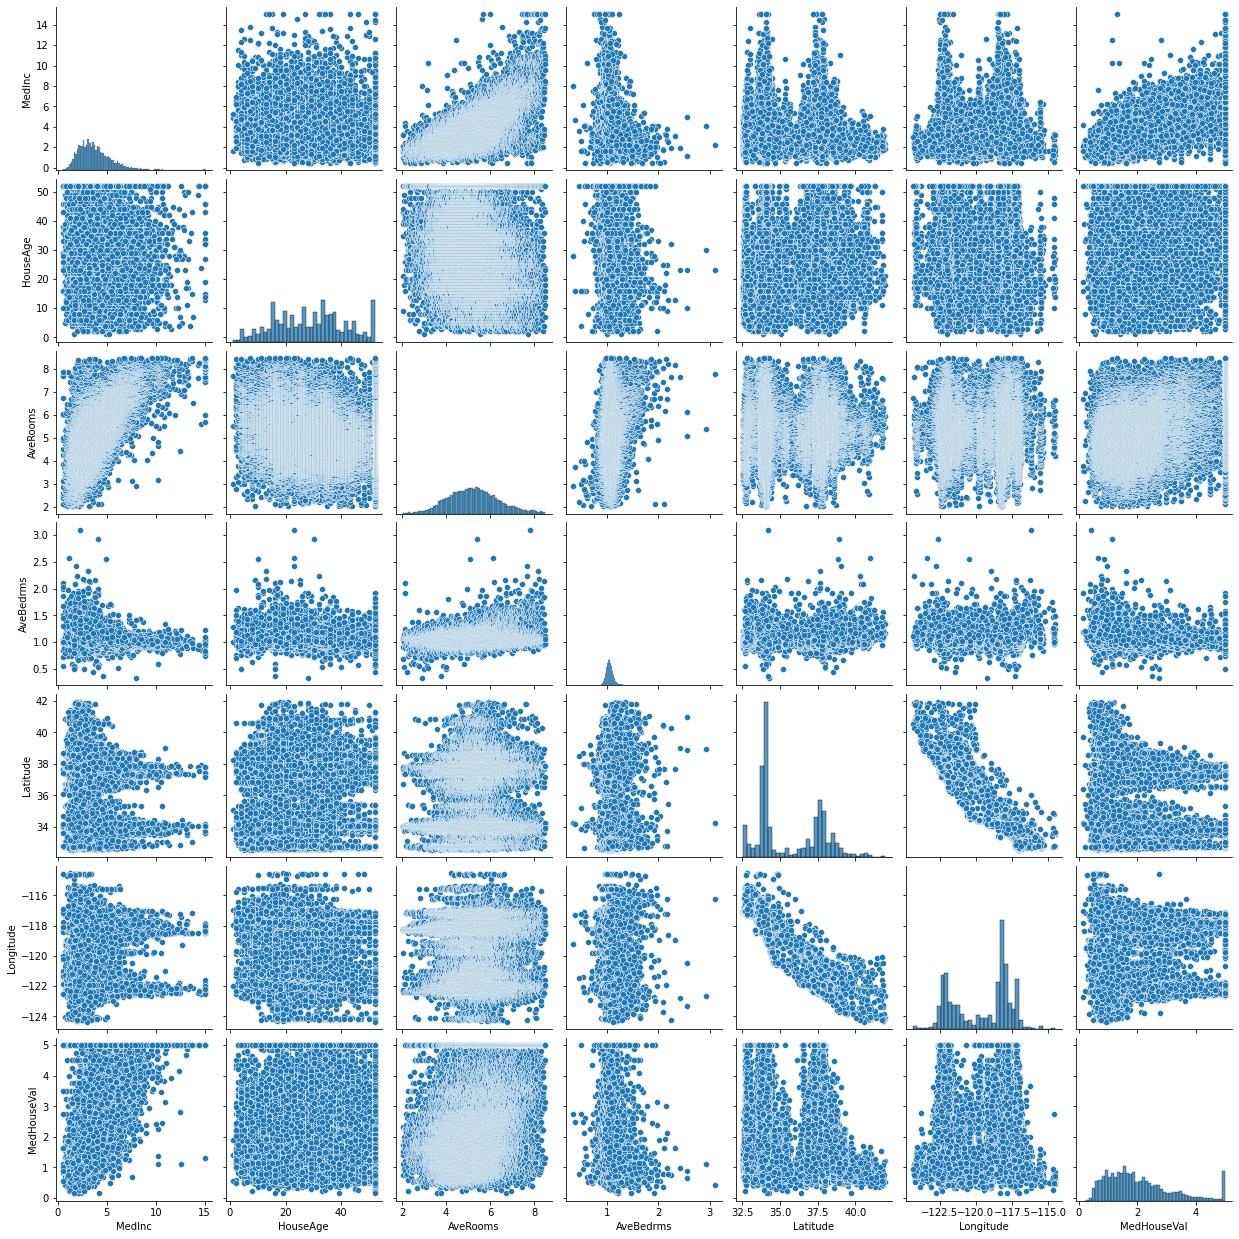

In [165]:
sns.pairplot(X)

In [332]:
X['sqr_MI'] = X['MedInc']*X['MedInc']
X['sqrt_MI'] = np.sqrt(X['MedInc'])
X['sqrt_lat'] = np.sqrt(X['Latitude'])
X['sqrt_rooms'] = np.sqrt(X['AveRooms'])
del X['MedHouseVal']

In [333]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X_train, Y_train)

rmse = np.sqrt(mean_squared_error(Y_test, model.predict(X_test)))
r2 = r2_score(Y_test, model.predict(X_test))
print('MSE:', rmse)
print('R2:', r2)

MSE: 0.6859698413139376
R2: 0.63602055247131


показатели немного улучшились

Вывод: незначительных улучшений метрик в 4-5% удалось достичь с помощью следующих последовательных шагов:
        - удаления из данных 2х менее значимых признаков с точки зрения корреляции с целевой переменной -> не привело к изменениям;
        - удаленые выбросов по 2м признакам -> результат немного улучшился;
        - формирование 4х дополнительных признаков как нелинейных зависимостей от имеющихся -> результат немного улучшился.